In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
#warnings.filterwarnings('ignore')

['.conda', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.spyder-py3', '.ssh', '3D Objects', '545_cluster_dataset programming 3.txt', 'aa.txt', 'AI.15puzzle', 'AI.8PUZZLE', 'AI.HW#2.PRO', 'AI.prog#1.A.ipynb', 'AI.Prog#1.Astar.complete', 'AI.Prog#1.Astar.complete1.ipynb', 'AI.prog#1.Astar.final8.ipynb', 'AI.Prog#1.Astar.main', 'AI.PROG#1.Astar15.ipynb', 'AI.PROG#2.8queen', 'AI.VACUUM.WORLD.ipynb', 'AppData', 'Application Data', 'Assignment 2 Word Vectors (due 1022, 1159pm) attached files Oct 16, 2021 831 PM.zip', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Double-Hard-Debias-master', 'Downloads', 'embedding', 'env.yml', 'eval.py', 'evaluate_similarity.py', 'F.Double-Hard-Debias-master', 'F.word-embeddings-benchmarks-master', 'Favorites', 'female_word_file.txt', 'Final.EXAM.ipynb', 'Full.ipynb', 'Fuzzy-C-means-from-scratch-main', 'gender_specific_full.json', 'gensim-data', 'glove.6B.300d.txt', 'glove.6B.50d.txt', 'GloVe_Debias.ipynb', 'GloVe_Ev

In [200]:
dataset = pd.read_csv("healthcare-dataset-stroke-dataf.csv")

In [201]:
type(dataset)

pandas.core.frame.DataFrame

In [202]:
dataset.shape

(5110, 12)

In [203]:
dataset.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,2,2,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,1,2,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,1,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,2,2,174.12,24.0,2,1


In [204]:
dataset.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
766,23645,0,31.0,0,0,0,1,2,91.08,34.3,2,0
3172,40379,0,57.0,0,0,1,1,2,98.57,31.6,2,0
2575,49903,1,27.0,0,0,0,1,1,72.61,38.5,2,0
1816,9170,1,60.0,0,0,1,2,1,185.71,NaN,4,0
4583,37515,0,46.0,0,0,1,3,2,76.43,22.7,4,0


In [205]:
dataset.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,1.837965,1.491977,106.147677,28.893237,2.585519,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.118698,0.499985,45.283560,7.854067,1.092522,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000,1.000000,55.120000,10.300000,1.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,1.000000,77.245000,23.500000,2.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.885000,28.100000,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,2.000000,114.090000,33.100000,4.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,5.000000,2.000000,271.740000,97.600000,4.000000,1.000000


In [206]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


In [209]:
info = ["id","1: male, 0: female","hypertension, 1: yes, 0: no","heart_disease, 1: yes, 0: no"," ever_married, 1: yes, 0: no","work_type, 1: private, 2: govt_job, 3: self-employed, 4: children, 5: Never_worked","Residence_type, 1: urban, 2: rural"," avg_glucose_level","exercise induced angina","bmi","smoking_status, 1: formerly smoked, 2: never smoked, 3: smokes, 4: unknown"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

id:			id
gender:			1: male, 0: female
age:			hypertension, 1: yes, 0: no
hypertension:			heart_disease, 1: yes, 0: no
heart_disease:			 ever_married, 1: yes, 0: no
ever_married:			work_type, 1: private, 2: govt_job, 3: self-employed, 4: children, 5: Never_worked
work_type:			Residence_type, 1: urban, 2: rural
Residence_type:			 avg_glucose_level
avg_glucose_level:			exercise induced angina
bmi:			bmi
smoking_status:			smoking_status, 1: formerly smoked, 2: never smoked, 3: smokes, 4: unknown


In [210]:
dataset["stroke"].describe()

count    5110.000000
mean        0.048728
std         0.215320
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64

In [211]:
dataset["stroke"].unique()

array([1, 0], dtype=int64)

In [212]:
print(dataset.corr()["stroke"].abs().sort_values(ascending=False))

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
smoking_status       0.066393
work_type            0.058224
bmi                  0.042374
Residence_type       0.015458
gender               0.008929
id                   0.006388
Name: stroke, dtype: float64


0    4861
1     249
Name: stroke, dtype: int64


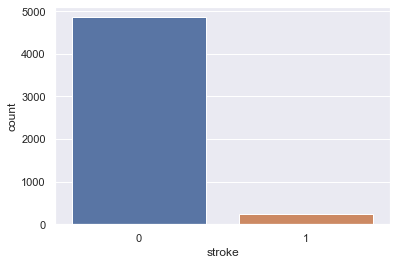

In [213]:
y = dataset["stroke"]

sns.countplot(y)


stroke_temp = dataset.stroke.value_counts()

print(stroke_temp)

In [214]:
print("Percentage of patience without heart problems: "+str(round(stroke_temp[0]*100/5110,2)))
print("Percentage of patience with heart problems: "+str(round(stroke_temp[1]*100/5110,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.stroke == 0])
# countHaveDisease = len(df[df.stroke == 1])

Percentage of patience without heart problems: 95.13
Percentage of patience with heart problems: 4.87


In [215]:
dataset["gender"].unique()

array([1, 0, 2], dtype=int64)

<AxesSubplot:xlabel='gender', ylabel='stroke'>

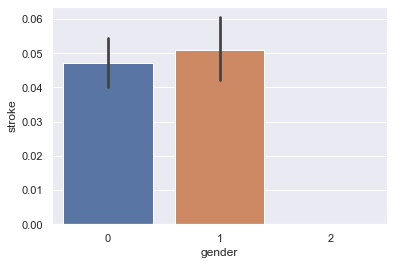

In [216]:
sns.barplot(dataset["gender"],y)

In [251]:
#I will complete this
from plotly.subplots import make_subplots
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
fig = make_subplots(
    rows=2, cols=2,subplot_titles=('','<b>Distribution Of Female Ages<b>','<b>Distribution Of Male Ages<b>','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2}       ,{"type": "histogram"}] ,
           [None                               ,{"type": "histogram"}]            ,                                      
          ]
)

fig.add_trace(
    go.Pie(values=dataset.gender.value_counts().values,labels=['<b>Female<b>','<b>Male<b>','<b>Other<b>'],hole=0.3,pull=[0,0.08,0.3],marker_colors=['pink','lightblue','green'],textposition='inside'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=dataset.query('gender=="0"').age,marker= dict(color='pink'),name='Female Ages'
    ),
    row=1, col=2
)


fig.add_trace(
    go.Histogram(
        x=dataset.query('gender=="1"').age,marker= dict(color='lightblue'),name='Male Ages'
    ),
    row=2, col=2
)


fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Age-Sex Infrence<b>",
)

fig.show()

In [217]:
dataset["age"].unique()

array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
       9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01,
       1.08e+00, 1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e

<AxesSubplot:xlabel='age', ylabel='stroke'>

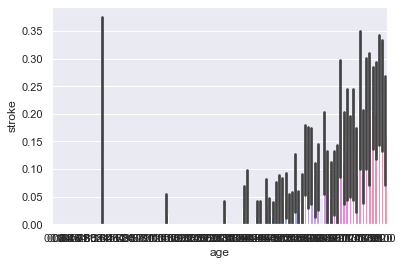

In [218]:
sns.barplot(dataset["age"],y)

In [219]:
dataset["hypertension"].describe()

count    5110.000000
mean        0.097456
std         0.296607
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64

In [220]:
dataset["hypertension"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='hypertension', ylabel='stroke'>

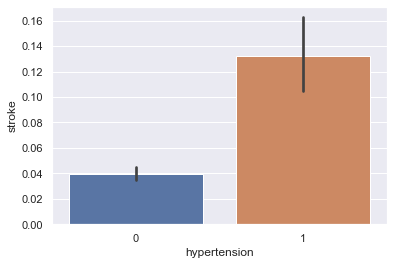

In [221]:
sns.barplot(dataset["hypertension"],y)

In [222]:
dataset["heart_disease"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

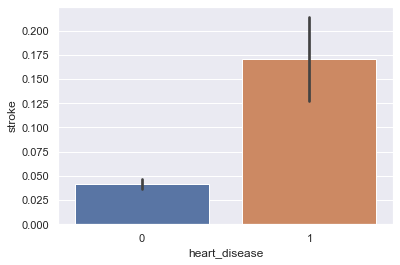

In [223]:
sns.barplot(dataset["heart_disease"],y)

In [224]:
dataset["ever_married"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

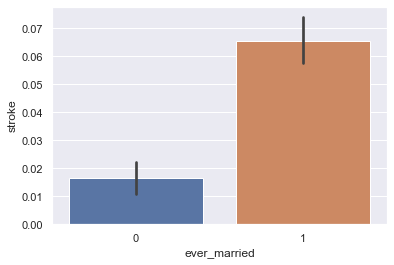

In [225]:
sns.barplot(dataset["ever_married"],y)

In [226]:
dataset["work_type"].unique()

array([1, 2, 3, 4, 5], dtype=int64)

<AxesSubplot:xlabel='work_type', ylabel='stroke'>

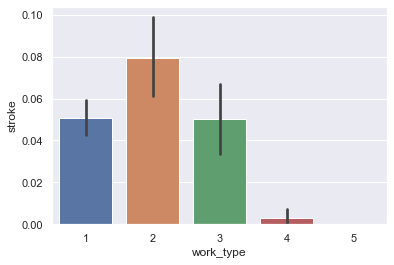

In [227]:
sns.barplot(dataset["work_type"],y)

In [228]:
dataset["Residence_type"].unique()

array([1, 2], dtype=int64)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

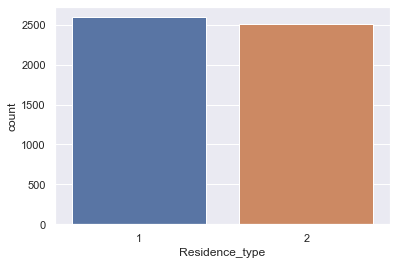

In [229]:
sns.countplot(dataset["Residence_type"])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='stroke'>

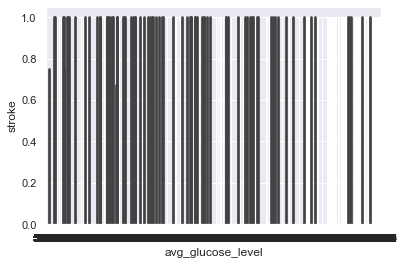

In [230]:
sns.barplot(dataset["avg_glucose_level"],y)

In [231]:
dataset["bmi"].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

<AxesSubplot:xlabel='bmi', ylabel='stroke'>

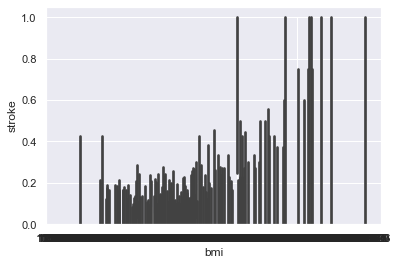

In [232]:
sns.barplot(dataset["bmi"],y)

In [233]:
dataset["smoking_status"].unique()

array([1, 2, 3, 4], dtype=int64)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

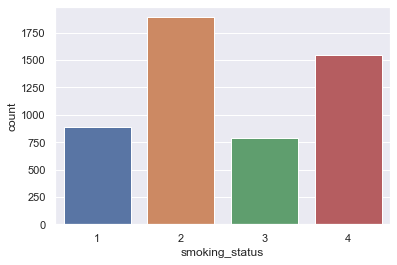

In [234]:
sns.countplot(dataset["smoking_status"])

In [ ]:
#IV. Train Test split

In [235]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("stroke",axis=1)
stroke = dataset["stroke"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,stroke,test_size=0.20,random_state=0)

In [236]:
X_train.shape

(4088, 11)

In [237]:
X_test.shape

(1022, 11)

In [238]:
Y_train.shape

(4088,)

In [239]:
Y_test.shape

(1022,)

In [ ]:
#V. Model Fitting

In [240]:
from sklearn.metrics import accuracy_score

In [ ]:
#Logistic Regression

In [242]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [197]:
Y_pred_lr.shape

(61,)

In [198]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

ValueError: Found input variables with inconsistent numbers of samples: [61, 1022]

In [ ]:
#Naive Bayes

In [243]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [61]:
Y_pred_nb.shape

(61,)

In [62]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [ ]:
#SVM

In [244]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [64]:
Y_pred_svm.shape

(61,)

In [65]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [ ]:
#K Nearest Neighbors

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [67]:
Y_pred_knn.shape

(61,)

In [68]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [ ]:
#Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [70]:
print(Y_pred_dt.shape)

(61,)


In [71]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [ ]:
#Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [73]:
Y_pred_rf.shape

(61,)

In [74]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


In [ ]:
#XGBoost

In [88]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

[22:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [89]:
Y_pred_xgb.shape

(61,)

In [90]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 78.69 %


In [ ]:
#Neural Network

In [91]:
from keras.models import Sequential
from keras.layers import Dense

In [92]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [93]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 0s 996us/step - loss: 62.6459 - accuracy: 0.4587
Epoch 2/300
8/8 [==============================] - 0s 940us/step - loss: 54.6604 - accuracy: 0.4587
Epoch 3/300
8/8 [==============================] - 0s 1ms/step - loss: 47.3073 - accuracy: 0.4587
Epoch 4/300
8/8 [==============================] - 0s 1ms/step - loss: 40.5997 - accuracy: 0.4587
Epoch 5/300
8/8 [==============================] - 0s 1ms/step - loss: 34.5276 - accuracy: 0.4587
Epoch 6/300
8/8 [==============================] - 0s 1ms/step - loss: 29.2901 - accuracy: 0.4587
Epoch 7/300
8/8 [==============================] - 0s 918us/step - loss: 24.6298 - accuracy: 0.4587
Epoch 8/300
8/8 [==============================] - 0s 1ms/step - loss: 21.1352 - accuracy: 0.4587
Epoch 9/300
8/8 [==============================] - 0s 1ms/step - loss: 18.2812 - accuracy: 0.4587
Epoch 10/300
8/8 [==============================] - 0s 879us/step - loss: 16.0898 - accuracy: 0.4587
Epoch 11/30

In [94]:
Y_pred_nn = model.predict(X_test)

In [95]:
Y_pred_nn.shape

(61, 1)

In [96]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [97]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 67.21 %


In [ ]:
#VI. Output final score

In [98]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 78.69 %
The accuracy score achieved using Neural Network is: 67.21 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

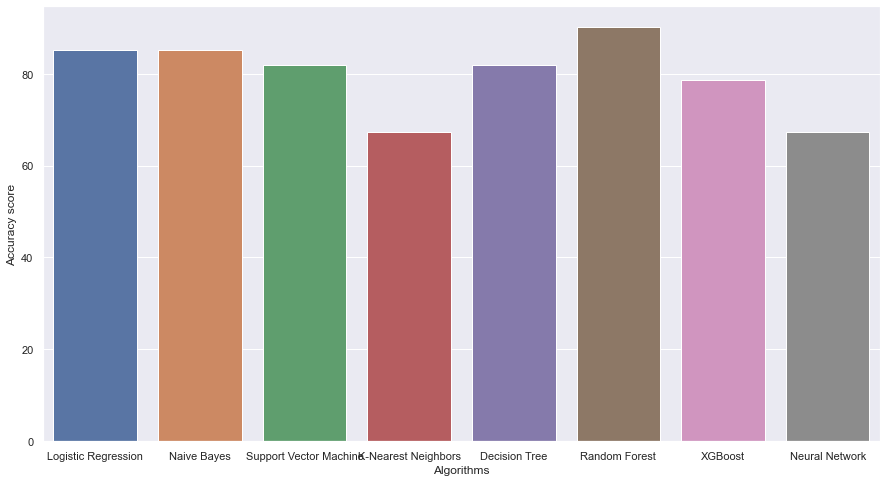

In [99]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)